# ​📩 Système Intelligent de Filtrage des Emails pour la Sécurité des Communications​

# 📔​✅​ Bibliothéque

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt


from nltk.tokenize import wordpunct_tokenize


# 1. Analyse exploratoire des données (EDA)


* Importation des données

In [172]:
df = pd.read_csv('DataSet_Emails.csv')

# le titre de chaque column
print(df.columns.tolist())

# La taille des donnés
print(f'il exist {df.shape[0]} ligne et {df.shape[1]} columns')


['Unnamed: 0', 'message_id', 'text', 'label', 'label_text', 'subject', 'message', 'date']
il exist 31716 ligne et 8 columns


In [173]:
# le type des data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31716 non-null  int64 
 1   message_id  31716 non-null  int64 
 2   text        31665 non-null  object
 3   label       31716 non-null  int64 
 4   label_text  31716 non-null  object
 5   subject     31442 non-null  object
 6   message     31371 non-null  object
 7   date        31716 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.9+ MB
None


* Identification des valeurs manquantes et des doublons

In [174]:
#les Doublons
print(f'Il exist {df.duplicated().sum()} doublons')
#le manquantes
print('les Valeur Manquant sont :')
print(df.isnull().sum())

Il exist 0 doublons
les Valeur Manquant sont :
Unnamed: 0      0
message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64


* la suppréssion des column inutile

In [175]:
df = df.drop('Unnamed: 0' , axis = 1)
# pour renommer une colomn 
#df = df.rename(columns={'label': 'NouveauNom'})


* la suppression des valeur manquants

In [176]:
print(f'il exist {df.shape[0]} ligne et {df.shape[1]} columns')
df = df.dropna()
print(f'il exist {df.shape[0]} ligne et {df.shape[1]} columns')
df.head()

il exist 31716 ligne et 7 columns
il exist 31148 ligne et 7 columns


,message_id,text,label,label_text,subject,message,date
0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


* La distribution Des spam et non Spam 

Le nombre des spam et non-spam
label_text
spam    15645
ham     15503
Name: count, dtype: int64


<Axes: title={'center': 'Distribution des spams vs ham'}, xlabel='label_text'>

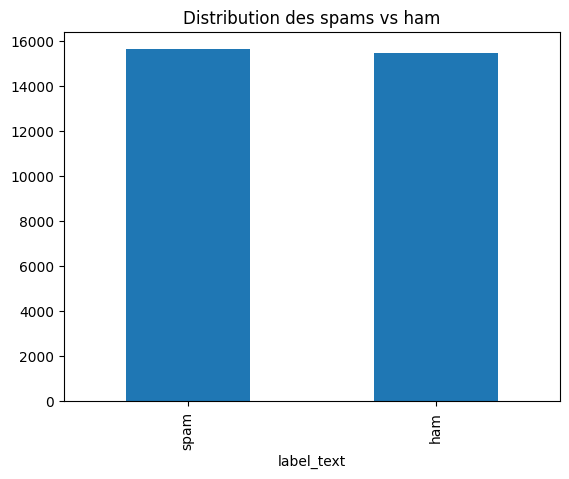

In [177]:
# Distribution des labels
print('Le nombre des spam et non-spam')
print(df['label_text'].value_counts())
df['label_text'].value_counts().plot(kind='bar', title="Distribution des spams vs ham")

* Matrice de corrélation 

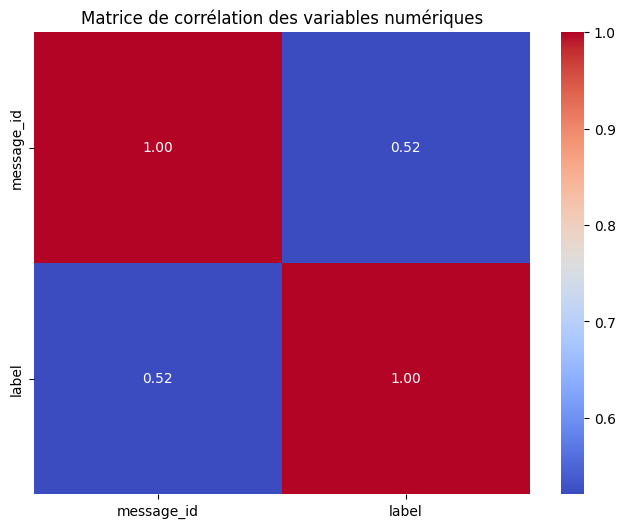

In [178]:
df_numerique = df.select_dtypes(include='number')
corr= df_numerique.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des variables numériques")
plt.show()


* 😶‍🌫️​ Création de nuage pour les mots fréquents dans les spams et un autre pour les emails légitimes (ham).

* ​ Dans votre cas, le nuage de mots permet de voir quels mots apparaissent le plus souvent dans les messages spam par rapport aux messages légitimes (ham).
* Les mots les plus gros sont les plus fréquents
* Les messages ham pourraient montrer des mots plus personnels ou conversationnels

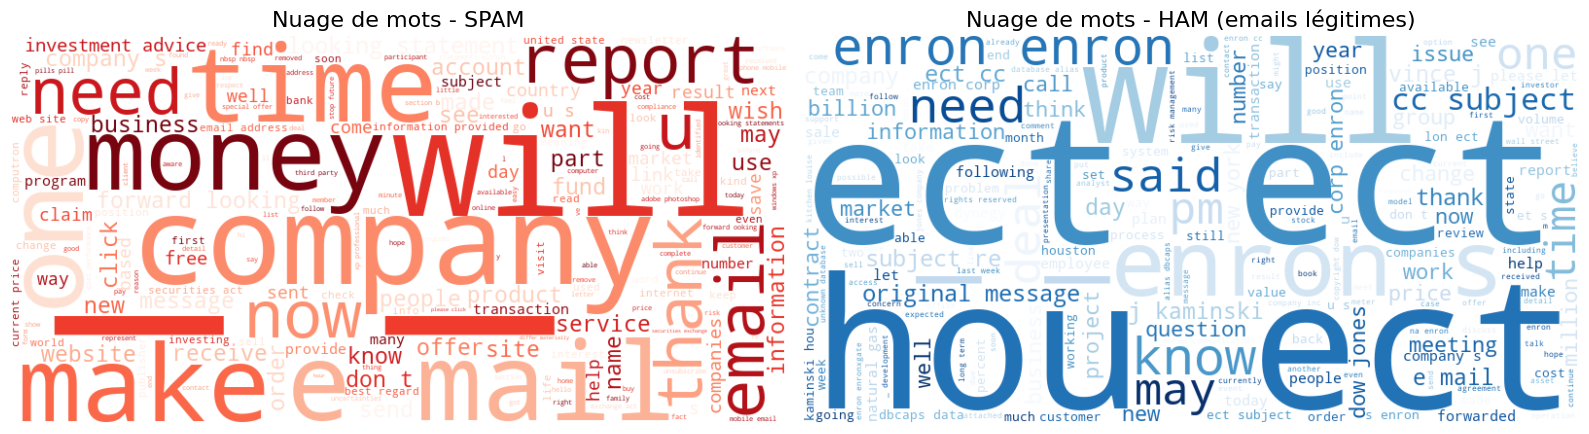

In [179]:
# Créer les nuages de mots

spam_text = " ".join(df[df['label_text'] == 'spam']['message'])
ham_text = " ".join(df[df['label_text'] == 'ham']['message'])

wordcloud_spam = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_text)
wordcloud_ham = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_text)


plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots - SPAM", fontsize=16)


plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots - HAM (emails légitimes)", fontsize=16)

plt.tight_layout()
plt.show()


# 2.Prétraitement du texte 

* Convertir tout le texte en minuscules

In [198]:

df_caracter = ['text','label_text', 'subject', 'message']
for column in df_caracter :
    df[column] = df[column].astype(str).str.lower()
    


* Appliquer la tokenisation : nltk.word_tokenize(text).
* Tokenisation :Cela découpe le texte brut en mots individuels 

In [221]:
# Fonction pour tokenizer une colonne
def tokenize_column(column):
    return column.apply(lambda x: wordpunct_tokenize(str(x)))

# Appliquer la tokenization aux colonnes sélectionnées
for col in df_caracter:
    df[f"{col}_tokens"] = tokenize_column(df[col])
# Afficher le résultat
print(list(df.columns))

['message_id', 'text', 'label', 'label_text', 'subject', 'message', 'date', 'text_tokens', 'label_text_tokens', 'subject_tokens', 'message_tokens']


* Supprimer les stopwords (mots vides) avec nltk.corpus.stopwords.words('english').

* Supprimer la ponctuation et les caractères spéciaux à l’aide de re.sub() ou string.punctuation. 

* Appliquer le stemming avec PorterStemmer() de NLTK pour réduire les mots à leur racine.

# 3.Extraction des caractéristiques

# 4.Entraînement de plusieurs modèles de classification

# 5.Évaluation des modèles

# 6.Validation croisée


# 7.Sélection et sauvegarde du meilleur modèle

# 8.Interface interactive avec Streamlit